<a href="https://colab.research.google.com/github/Fcazarez/WNPG_Transit_Ass/blob/main/WinnipegTransit_Showcase_FC_0378585_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Winnipeg Transit Asignment**
# **Data Cleaning, bulletin 123908**
# **Felix Cazarez**


# **a) Please provide your observations and notes on the raw data, data model, metadata, etc.**
## * i. Clean up the data; spaces, typos, remove duplicates wherever possible.
## * Make the file ready to be used load from one IT system to another (manual interface).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Loading the Main file


git_url_main = 'https://raw.githubusercontent.com/Fcazarez/WNPG_Transit_Ass/main/Main.csv?token=GHSAT0AAAAAACKMXNC325HX5ER7HBPB5PXQZKYANNA'
git_url_reference = 'https://raw.githubusercontent.com/Fcazarez/WNPG_Transit_Ass/main/Reference%20Sheet.csv?token=GHSAT0AAAAAACKMXNC3VPLCTYBFD2YEWXSIZKYB6QA'
df_main = pd.read_csv(git_url_main)
df_ref = pd.read_csv(git_url_reference)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0    Request Time(a)                     49999 non-null  object 
 1    Internal Customer ID(a)             49999 non-null  int64  
 2    Internal Driver ID(a)               49999 non-null  int64  
 3    Vehicle(a)                          49999 non-null  object 
 4    Origin Address(a)                   49999 non-null  object 
 5    Origin Address(a).1                 0 non-null      float64
 6    Origin Xcoordinate(a)               0 non-null      float64
 7    Origin Ycoordinate(a)               0 non-null      float64
 8    Destination Address(a)              49999 non-null  object 
 9    Destination Xcoordinate(a)          0 non-null      float64
 10   Destination Ycoordinate(a)          0 non-null      float64
 11   Origin City(a)             

<ipython-input-2-604de4712654>:9: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ref = pd.read_csv(git_url_reference)


**Comments:**

The dataset concerns ride requirements for Winnipeg Transit Plus.

*Data Structure:* It is a 4999x24 matrix. Five rows lack information, and three rows may contain noise or irrelevant data.

*Column Names:* Column names have an unnecessary (a) suffix, which could be omitted for clarity.

*Data Integrity:* "Origin Address" is repeated, suggesting a data consistency issue.

*Categorical Data:* Columns like "Vehicle(a)," "Origin City(a)," "Timing Preference(a)," etc., appear to contain categorical data but are detected like object which could mean some consistency issue.

*Data Types:* Numerical features are currently classified as 'object' types, indicating a need for proper conversion for accurate analysis.

*General Remarks:* The dataset holds valuable information, but cleaning and preprocessing steps are necessary. Addressing noise, handling data type inconsistencies, and clarifying column significance will enhance analysis accuracy.








In [3]:
df_main.sample(n=5, random_state=42)


,Request Time(a),Internal Customer ID(a),Internal Driver ID(a),Vehicle(a),Origin Address(a),Origin Address(a).1,Origin Xcoordinate(a),Origin Ycoordinate(a),Destination Address(a),Destination Xcoordinate(a),...,Run End Time(a),Mobility Requirement Type(a),Guest Count(a),Guest Mobility Requirement Type(a),Child(a),Customer Age(a),Trip Service Needs(a),,Unnamed: 23,Unnamed: 24
33552,2023-02-06T14:15:00,4668,2202,705 BUS,1225 St Mary's Rd,NaN,NaN,NaN,21 Clayton Dr,NaN,...,2023-02-06T22:00:00,Walker,0,Ambulant,0,75,Walker,,NaN,NaN
9427,2023-01-12T10:30:00,18663,2399,204 CAR,409 Tache Ave,NaN,NaN,NaN,440 River Rd,NaN,...,2023-01-12T18:00:00,Ambulant,0,Ambulant,0,42,,,NaN,NaN
199,2023-01-01T12:15:00,9219,1742,1504 BUS,25 Centre St,NaN,NaN,NaN,433 River Ave,NaN,...,2023-01-01T20:00:00,Extra Space Walker,0,Ambulant,0,78,Extra Space Walker,,NaN,NaN
12447,2023-01-15T10:21:00,17037,1412,1761 CAR,21 Roslyn Rd,NaN,NaN,NaN,300 Hugo St N,NaN,...,2023-01-15T20:00:00,Walker,0,Ambulant,0,79,Walker,,NaN,NaN
39488,2023-02-11T12:45:00,2710,2852,1764 CAR,409 Tache Ave,NaN,NaN,NaN,107 Henry Dormer Dr,NaN,...,2023-02-11T19:00:00,Ambulant,0,Ambulant,0,71,Ambulant,,NaN,NaN


In [4]:
rows_with_unnamed_23_data = df_main[df_main['Unnamed: 23'].notnull()]
rows_with_unnamed_23_data


,Request Time(a),Internal Customer ID(a),Internal Driver ID(a),Vehicle(a),Origin Address(a),Origin Address(a).1,Origin Xcoordinate(a),Origin Ycoordinate(a),Destination Address(a),Destination Xcoordinate(a),...,Run End Time(a),Mobility Requirement Type(a),Guest Count(a),Guest Mobility Requirement Type(a),Child(a),Customer Age(a),Trip Service Needs(a),,Unnamed: 23,Unnamed: 24
1464,Pickup With Dropoff at Appointment Time,16552,609,1204 BUS,624 Broadway,NaN,NaN,NaN,,NaN,...,2023-01-03T10:50:00,2023-01-04T00:00:00,Extra Space Walker,0,Ambulant,0,56,Driver Instructions,,NaN
1465,Pickup With Dropoff at Appointment Time,9370,2660,1204 BUS,624 Broadway,NaN,NaN,NaN,,NaN,...,2023-01-03T10:50:00,2023-01-04T00:00:00,Extra Space Walker,0,Ambulant,0,56,Extra Space Walker,,NaN
1466,Pickup With Dropoff at Appointment Time,10811,2854,1204 BUS,624 Broadway,NaN,NaN,NaN,,NaN,...,2023-01-03T10:50:00,2023-01-04T00:00:00,Extra Space Walker,0,Ambulant,0,56,No Car Ambulant,,NaN
1467,Pickup,11458,2220,602 BUS,790 Sherbrook St,NaN,NaN,NaN,624 Broadway,NaN,...,2023-01-03T12:27:25,2023-01-03T23:00:00,Extra Space Walker,0,Ambulant,0,56,Driver Instructions,,NaN
1468,Pickup,13971,2390,602 BUS,790 Sherbrook St,NaN,NaN,NaN,624 Broadway,NaN,...,2023-01-03T12:27:25,2023-01-03T23:00:00,Extra Space Walker,0,Ambulant,0,56,Extra Space Walker,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43962,Winnipeg,10139,622,1204 BUS,3030 Pembina Hwy,NaN,NaN,NaN,200,NaN,...,2023-02-16T09:14:21,2023-02-16T09:26:16,2023-02-17T00:00:00,Walker,0,Ambulant,0,83,Walker,
43963,Winnipeg,19714,2505,206 CAR,200,NaN,NaN,NaN,49.80920135,NaN,...,2023-02-16T11:11:40,2023-02-16T11:17:06,2023-02-16T23:00:00,Walker,0,Ambulant,0,83,Walker,
45869,Winnipeg,5547,523,722 CAR,123 Scurfield Blvd,NaN,NaN,NaN,200,NaN,...,2023-02-17T13:45:20,2023-02-17T13:52:43,2023-02-17T18:30:00,Ambulant,0,Ambulant,0,81,Ambulant,
49738,Pickup,5962,1992,1502 BUS,414 Osborne St,NaN,NaN,NaN,624 Broadway,NaN,...,2023-02-22T12:05:00,2023-02-23T00:00:00,Extra Space Walker,0,Ambulant,0,56,Extra Space Walker,,NaN


**Comments:**

Numerous columns contain incorrect values, with the first column featuring misplaced data. Issues persist in the mobility requirement, guest count, guest mobility, and age columns.

The last three columns contain ambiguous and noisy data. Regarding the "Unnamed: 23" column, it contains noise in 0.122% of the dataset (61 rows).

Given this proportion falls below the 5% threshold, removing these rows won't significantly affect the DataFrame's overall meaning

In [5]:
df_main.drop(rows_with_unnamed_23_data.index, inplace=True)


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49938 entries, 0 to 49998
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0    Request Time(a)                     49938 non-null  object 
 1    Internal Customer ID(a)             49938 non-null  int64  
 2    Internal Driver ID(a)               49938 non-null  int64  
 3    Vehicle(a)                          49938 non-null  object 
 4    Origin Address(a)                   49938 non-null  object 
 5    Origin Address(a).1                 0 non-null      float64
 6    Origin Xcoordinate(a)               0 non-null      float64
 7    Origin Ycoordinate(a)               0 non-null      float64
 8    Destination Address(a)              49938 non-null  object 
 9    Destination Xcoordinate(a)          0 non-null      float64
 10   Destination Ycoordinate(a)          0 non-null      float64
 11   Origin City(a)             

In [7]:
# Create a DataFrame to store unique values
unique_values_df = pd.DataFrame(columns=['Column', 'Unique_Values'])

# Iterate over columns
for column in df_main.columns:
    unique_values = df_main[column].unique()
    unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)

# Display the results
unique_values_df


<ipython-input-7-9ba719bafc99>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-7-9ba719bafc99>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-7-9ba719bafc99>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-7-9ba719bafc99>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

,Column,Unique_Values
0,Request Time(a),"[ 2023-01-01T10:42:00, 2023-01-01T09:31:00, ..."
1,Internal Customer ID(a),"[17154, 2015, 7701, 15671, 6445, 17784, 15179,..."
2,Internal Driver ID(a),"[2192, 2103, 2642, 2921, 1204, 2710, 888, 1732..."
3,Vehicle(a),"[ 202 CAR, 675-02 CAR, 1204 BUS, 804 BUS, ..."
4,Origin Address(a),"[ 374 Edmonton St, 1080 Powers St, 167 Colon..."
5,Origin Address(a).1,[nan]
6,Origin Xcoordinate(a),[nan]
7,Origin Ycoordinate(a),[nan]
8,Destination Address(a),"[ 305 Machray Ave, 1350 Grant Ave, 560 Bever..."
9,Destination Xcoordinate(a),[nan]


### DataFrame Comment:

The following features contain no values and can be safely removed from the dataset:

- 'Origin Address(a).1'
- 'Origin Xcoordinate(a)'
- 'Origin Ycoordinate(a)'
- 'Destination Xcoordinate(a)'
- 'Destination Ycoordinate(a)'
- 'Child(a)'
- (Empty Column)
- 'Unnamed: 23'
- 'Unnamed: 24'

These columns do not contribute meaningful information and can be dropped for a cleaner and more efficient analysis.




### Comment:

To identify, rename and drop columns with NaN or empty values, It is better to print the column names directly from the DataFrame. Some column names may include special characters to ensure accuracy in the removal process.




In [8]:
# Print the names to drop the NAN or empty columns
print(df_main.columns)

Index([' Request Time(a)', ' Internal Customer ID(a)',
       ' Internal Driver ID(a)', ' Vehicle(a)', ' Origin Address(a)',
       ' Origin Address(a).1', ' Origin Xcoordinate(a)',
       ' Origin Ycoordinate(a)', ' Destination Address(a)',
       ' Destination Xcoordinate(a)', ' Destination Ycoordinate(a)',
       ' Origin City(a)', ' Timing Preference(a)', ' Start Time(a)',
       ' End Time(a)', ' Run End Time(a)', ' Mobility Requirement Type(a)',
       ' Guest Count(a)', ' Guest Mobility Requirement Type(a)', ' Child(a)',
       ' Customer Age(a)', ' Trip Service Needs(a)', ' ', 'Unnamed: 23',
       'Unnamed: 24'],
      dtype='object')


In [9]:
columns_to_drop = [' Origin Address(a).1',
                   ' Origin Xcoordinate(a)',
                   ' Origin Ycoordinate(a)',
                   ' Destination Xcoordinate(a)',
                   ' Destination Ycoordinate(a)',
                   ' Child(a)', ' ', 'Unnamed: 23',
                   'Unnamed: 24']

# Check if the columns exist before attempting to drop them
missing_columns = [col for col in columns_to_drop if col not in df_main.columns]

# Drop the columns only if they exist
if not missing_columns:
    df_main.drop(columns=columns_to_drop, inplace=True)
    print("Columns dropped successfully.")
else:
    print(f"Columns not found: {missing_columns}")



Columns dropped successfully.


In [10]:
# Create a dictionary to map old column names to new names
new_column_names = {' Request Time(a)' : 'Request_Time',
                    ' Internal Customer ID(a)' : 'Internal_Customer_ID',
                    ' Internal Driver ID(a)' : 'Internal_Driver_ID',
                    ' Vehicle(a)': 'Vehicle',
                    ' Origin Address(a)': 'Origin_Address',
                    ' Destination Address(a)': 'Destination_Address',
                    ' Origin City(a)':'Origin_City',
                    ' Timing Preference(a)':'Timing_Preference',
                    ' Start Time(a)': 'Start_Time',
                    ' End Time(a)': 'End_Time',
                    ' Run End Time(a)': 'Run_End_Time',
                    ' Mobility Requirement Type(a)': 'Mobility_Requirement_Type',
                    ' Guest Count(a)': 'Guest_Count',
                    ' Guest Mobility Requirement Type(a)': 'Guest_Mobility_Requirement_Type',
                    ' Customer Age(a)': 'Customer_Age',
                    ' Trip Service Needs(a)': 'Trip_Service_Needs'
}

# Rename the columns using the dictionary
df_main.rename(columns=new_column_names, inplace=True)

# Verify the changes
df_main.head().T


,0,1,2,3,4
Request_Time,2023-01-01T10:42:00,2023-01-01T09:31:00,2023-01-01T20:39:00,2023-01-01T20:39:00,2023-01-01T18:18:00
Internal_Customer_ID,17154,2015,7701,15671,6445
Internal_Driver_ID,2192,2103,2642,2921,1204
Vehicle,202 CAR,675-02 CAR,1204 BUS,1204 BUS,804 BUS
Origin_Address,374 Edmonton St,1080 Powers St,167 Colony St,167 Colony St,408 Paufeld Dr
Destination_Address,305 Machray Ave,1350 Grant Ave,560 Beverley St,560 Beverley St,167 Colony St
Origin_City,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg
Timing_Preference,Pickup With Dropoff at Appointment Time,Pickup With Dropoff at Appointment Time,Pickup,Pickup,Pickup With Dropoff at Appointment Time
Start_Time,2023-01-01T10:44:31,2023-01-01T09:08:21,2023-01-01T20:16:55,2023-01-01T20:16:55,2023-01-01T18:02:30
End_Time,2023-01-01T10:56:44,2023-01-01T09:29:58,2023-01-01T20:27:55,2023-01-01T20:27:55,2023-01-01T18:33:32


In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49938 entries, 0 to 49998
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Request_Time                     49938 non-null  object
 1   Internal_Customer_ID             49938 non-null  int64 
 2   Internal_Driver_ID               49938 non-null  int64 
 3   Vehicle                          49938 non-null  object
 4   Origin_Address                   49938 non-null  object
 5   Destination_Address              49938 non-null  object
 6   Origin_City                      49938 non-null  object
 7   Timing_Preference                49938 non-null  object
 8   Start_Time                       49938 non-null  object
 9   End_Time                         49938 non-null  object
 10  Run_End_Time                     49938 non-null  object
 11  Mobility_Requirement_Type        49938 non-null  object
 12  Guest_Count                     

In [12]:
# Check for duplicated rows
duplicated_rows = df_main[df_main.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)


Duplicated Rows:
Empty DataFrame
Columns: [Request_Time, Internal_Customer_ID, Internal_Driver_ID, Vehicle, Origin_Address, Destination_Address, Origin_City, Timing_Preference, Start_Time, End_Time, Run_End_Time, Mobility_Requirement_Type, Guest_Count, Guest_Mobility_Requirement_Type, Customer_Age, Trip_Service_Needs]
Index: []


In [13]:
# Create a DataFrame with features as rows
features_df = pd.DataFrame(df_main.columns, columns=['Features'])

# Add a column for missing values
features_df['Missing_Values'] = df_main.isnull().sum().values

# Add a column for NaN values
features_df['NaN_Values'] = df_main.isna().sum().values

# Display the resulting DataFrame
features_df


,Features,Missing_Values,NaN_Values
0,Request_Time,0,0
1,Internal_Customer_ID,0,0
2,Internal_Driver_ID,0,0
3,Vehicle,0,0
4,Origin_Address,0,0
5,Destination_Address,0,0
6,Origin_City,0,0
7,Timing_Preference,0,0
8,Start_Time,0,0
9,End_Time,0,0


In [14]:
# Save the clean data file
#from google.colab import drive
#drive.mount('/content/drive')

#df_main.to_csv('/content/drive/MyDrive/Colab Notebooks/WNPG_Transit/clean_data.csv', index=False)


# **b) Format data for manipulation (tables). Create separate columns and extract.**
## * **i. Date and time separately**
## * **ii. Vehicle Number and vehicle type**

In [15]:
# Select jst the needed columns
time_columns = df_main.iloc[:, [0, 3, 8, 9, 10]]

# Display the selected columns
time_columns


,Request_Time,Vehicle,Start_Time,End_Time,Run_End_Time
0,2023-01-01T10:42:00,202 CAR,2023-01-01T10:44:31,2023-01-01T10:56:44,2023-01-01T22:00:00
1,2023-01-01T09:31:00,675-02 CAR,2023-01-01T09:08:21,2023-01-01T09:29:58,2023-01-01T20:00:00
2,2023-01-01T20:39:00,1204 BUS,2023-01-01T20:16:55,2023-01-01T20:27:55,2023-01-01T22:30:00
3,2023-01-01T20:39:00,1204 BUS,2023-01-01T20:16:55,2023-01-01T20:27:55,2023-01-01T22:30:00
4,2023-01-01T18:18:00,804 BUS,2023-01-01T18:02:30,2023-01-01T18:33:32,2023-01-01T20:00:00
...,...,...,...,...,...
49994,2023-02-22T14:44:00,201 CAR,2023-02-22T14:42:18,2023-02-22T14:51:37,2023-02-23T00:00:00
49995,2023-02-22T17:15:00,201 CAR,2023-02-22T16:45:29,2023-02-22T16:55:40,2023-02-23T00:00:00
49996,2023-02-22T14:30:00,1501 BUS,2023-02-22T14:27:40,2023-02-22T14:36:38,2023-02-23T00:00:00
49997,2023-02-22T18:45:00,1201 BUS,2023-02-22T18:38:27,2023-02-22T18:51:52,2023-02-22T20:30:00


In [16]:
df_main.iloc[:, 3]

0            202 CAR
1         675-02 CAR
2           1204 BUS
3           1204 BUS
4            804 BUS
            ...     
49994        201 CAR
49995        201 CAR
49996       1501 BUS
49997       1201 BUS
49998        701 BUS
Name: Vehicle, Length: 49938, dtype: object

In [17]:
clean_data = df_main

In [19]:
import pandas as pd

# Columns to be transformed
time_columns = ['Request_Time', 'Start_Time', 'End_Time', 'Run_End_Time']

for col in time_columns:
    clean_data[col] = pd.to_datetime(clean_data[col], errors='coerce')
    clean_data[f'{col}_Date'] = clean_data[col].dt.date
    clean_data[f'{col}_Time'] = clean_data[col].dt.time

# Display the updated DataFrame
selected_columns = clean_data[['Request_Time_Date', 'Request_Time_Time', 'Start_Time_Date', 'Start_Time_Time', 'End_Time_Date', 'End_Time_Time', 'Run_End_Time_Date', 'Run_End_Time_Time']]
print(selected_columns.sample(10))


      Request_Time_Date Request_Time_Time Start_Time_Date Start_Time_Time  \
20152        2023-01-23          14:04:00      2023-01-23        14:12:09   
15351        2023-01-18          14:16:00      2023-01-18        14:14:14   
30681        2023-02-02          13:16:00      2023-02-02        13:03:54   
1013         2023-01-03          10:51:00      2023-01-03        10:51:00   
40350        2023-02-13          09:14:00      2023-02-13        09:08:51   
45563        2023-02-17          09:50:00      2023-02-17        10:00:50   
616          2023-01-02          06:40:00      2023-01-02        06:38:25   
48737        2023-02-21          17:30:00      2023-02-21        17:34:25   
44737        2023-02-16          14:15:00      2023-02-16        14:33:24   
33815        2023-02-06          09:38:00      2023-02-06        10:01:36   

      End_Time_Date End_Time_Time Run_End_Time_Date Run_End_Time_Time  
20152    2023-01-23      14:31:38        2023-01-23          19:00:00  
15351   

In [20]:
# Step 1: Use a regular expression to extract the vehicle number and type
vehicle_info = clean_data['Vehicle'].str.extract(r'(\d+)-?\s(.*)')

# Step 2: Assign the extracted information to new columns in the DataFrame
clean_data['Vehicle_Number'] = vehicle_info[0]  # The first part (digits) goes into 'Vehicle_Number'
clean_data['Vehicle_Type'] = vehicle_info[1]  # The second part (remaining text) goes into 'Vehicle_Type'

# Display the updated DataFrame
selected_columns = clean_data[['Vehicle', 'Vehicle_Number', 'Vehicle_Type']]
print(selected_columns.sample(10))


         Vehicle Vehicle_Number Vehicle_Type
48869    784 CAR            784          CAR
49955   1502 BUS           1502          BUS
13717   1206 BUS           1206          BUS
15614    705 BUS            705          BUS
31337   1505 BUS           1505          BUS
11914    784 CAR            784          CAR
39068   1206 BUS           1206          BUS
19347    803 BUS            803          BUS
8666     804 BUS            804          BUS
25510    803 BUS            803          BUS


In [21]:
clean_data.sample(5).T

,14117,30883,1551,19566,42100
Request_Time,2023-01-17 15:45:00,2023-02-02 19:45:00,2023-01-03 12:36:00,2023-01-23 06:00:00,2023-02-14 18:15:00
Internal_Customer_ID,7812,12137,10970,17574,18203
Internal_Driver_ID,931,2482,2823,678,2503
Vehicle,785 CAR,604 BUS,786 CAR,1762 CAR,725 CAR
Origin_Address,1425 Regent Ave W,75 Brazier St,260 Adsum Dr,1920 William Ave W,820 Sherbrook St
Destination_Address,165 Donwood Dr,505 Munroe Ave,2300 Mcphillips St,1455 Mountain Ave,610 Portage Ave
Origin_City,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg
Timing_Preference,Pickup,Pickup,Pickup With Dropoff at Appointment Time,Pickup With Dropoff at Appointment Time,Pickup
Start_Time,2023-01-17 15:34:56,2023-02-02 19:23:33,2023-01-03 12:38:08,2023-01-23 06:05:21,2023-02-14 18:07:28
End_Time,2023-01-17 15:58:23,2023-02-02 19:49:12,2023-01-03 12:43:20,2023-01-23 06:15:21,2023-02-14 18:17:35


In [22]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49938 entries, 0 to 49998
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Request_Time                     49938 non-null  datetime64[ns]
 1   Internal_Customer_ID             49938 non-null  int64         
 2   Internal_Driver_ID               49938 non-null  int64         
 3   Vehicle                          49938 non-null  object        
 4   Origin_Address                   49938 non-null  object        
 5   Destination_Address              49938 non-null  object        
 6   Origin_City                      49938 non-null  object        
 7   Timing_Preference                49938 non-null  object        
 8   Start_Time                       49938 non-null  datetime64[ns]
 9   End_Time                         49938 non-null  datetime64[ns]
 10  Run_End_Time                     49688 non-null  datetime6

In [23]:
# change datatypes for dates
date_columns = ['Request_Time_Date', 'Start_Time_Date', 'End_Time_Date', 'Run_End_Time_Date']
clean_data[date_columns] = clean_data[date_columns].apply(pd.to_datetime, errors='coerce')


In [24]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49938 entries, 0 to 49998
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Request_Time                     49938 non-null  datetime64[ns]
 1   Internal_Customer_ID             49938 non-null  int64         
 2   Internal_Driver_ID               49938 non-null  int64         
 3   Vehicle                          49938 non-null  object        
 4   Origin_Address                   49938 non-null  object        
 5   Destination_Address              49938 non-null  object        
 6   Origin_City                      49938 non-null  object        
 7   Timing_Preference                49938 non-null  object        
 8   Start_Time                       49938 non-null  datetime64[ns]
 9   End_Time                         49938 non-null  datetime64[ns]
 10  Run_End_Time                     49688 non-null  datetime6

In [25]:
clean_data.nunique()

Request_Time                       20637
Internal_Customer_ID               17076
Internal_Driver_ID                  2501
Vehicle                               77
Origin_Address                      3078
Destination_Address                 3102
Origin_City                            4
Timing_Preference                      3
Start_Time                         45100
End_Time                           45543
Run_End_Time                         499
Mobility_Requirement_Type             21
Guest_Count                            4
Guest_Mobility_Requirement_Type        5
Customer_Age                          88
Trip_Service_Needs                    22
Request_Time_Date                     53
Request_Time_Time                   1007
Start_Time_Date                       53
Start_Time_Time                    29312
End_Time_Date                         53
End_Time_Time                      29748
Run_End_Time_Date                     54
Run_End_Time_Time                     53
Vehicle_Number  

In [26]:
# Dropping typos
unique_cities = clean_data['Origin_City'].unique()

print(unique_cities)



[' Winnipeg' ' Winnippeg' ' Winnnipeg' ' Sandy Hook']


In [27]:
clean_data['Origin_City'] = clean_data['Origin_City'].replace([' Winnippeg', ' Winnnipeg', ' Winnipeg', 'Winnipeg'], 'Winnipeg')


In [28]:
null_count = clean_data.isnull().sum()
null_count

Request_Time                         0
Internal_Customer_ID                 0
Internal_Driver_ID                   0
Vehicle                              0
Origin_Address                       0
Destination_Address                  0
Origin_City                          0
Timing_Preference                    0
Start_Time                           0
End_Time                             0
Run_End_Time                       250
Mobility_Requirement_Type            0
Guest_Count                          0
Guest_Mobility_Requirement_Type      0
Customer_Age                         0
Trip_Service_Needs                   0
Request_Time_Date                    0
Request_Time_Time                    0
Start_Time_Date                      0
Start_Time_Time                      0
End_Time_Date                        0
End_Time_Time                        0
Run_End_Time_Date                  250
Run_End_Time_Time                  250
Vehicle_Number                     503
Vehicle_Type             

In [29]:
#removing any leading whitespaces to enhance the accuracy of subsequent lookups
clean_data['Origin_Address'] = clean_data['Origin_Address'].str.lstrip()


In [30]:
print(clean_data['Origin_Address'])

0            374 Edmonton St
1             1080 Powers St
2              167 Colony St
3              167 Colony St
4             408 Paufeld Dr
                ...         
49994        196 Hindley Ave
49995       166 Meadowood Dr
49996          545 Peguis St
49997      1555 Regent Ave W
49998    63 Rick Boychuk Bay
Name: Origin_Address, Length: 49938, dtype: object


# *c) Lookup and reference*
## * i. Retrieve Origin/Destination XY coordinates (use appropriate formulas from Reference Sheet).
## * Correct errors where necessary, and standardize naming to be consistent where possible.
## * ii. Freeze rows and columns as appropriate for viewing by a business manager.

In [31]:
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Trip Date(a)                         49999 non-null  object
 1    Internal Customer ID(a)             50000 non-null  object
 2    Internal Driver ID(a)               50000 non-null  object
 3    Vehicle(a)                          50000 non-null  object
 4    Origin Address(a)                   50000 non-null  object
 5    Destination Address(a)              50000 non-null  object
 6    Origin City(a)                      50000 non-null  object
 7    Timing Preference(a)                50000 non-null  object
 8    Request Time(a)                     50000 non-null  object
 9    Start Time(a)                       50000 non-null  object
 10   End Time(a)                         50000 non-null  object
 11   Run End Time(a)                     5000

In [32]:

rows_with_unnamed_23_data = df_ref[df_ref['Unnamed: 23'].notnull()]
rows_with_unnamed_23_data

df_ref.drop(rows_with_unnamed_23_data.index, inplace=True)

# Create a DataFrame to store unique values
unique_values_df = pd.DataFrame(columns=['Column', 'Unique_Values'])

In [33]:
# Iterate over columns
for column in df_ref.columns:
    unique_values = df_ref[column].unique()
    unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)

# Display the results
unique_values_df




<ipython-input-33-9a6333341ee2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-33-9a6333341ee2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-33-9a6333341ee2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-33-9a6333341ee2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

,Column,Unique_Values
0,Trip Date(a),"[2023-01-01T00:00:00, 2023-01-02T00:00:00, 202..."
1,Internal Customer ID(a),"[17154, 2015, 7701, 15671, 6445, 17784, 15179,..."
2,Internal Driver ID(a),"[2192, 2103, 2642, 2921, 1204, 2710, 888, 1732..."
3,Vehicle(a),"[ 202 CAR, 675-02 CAR, 1204 BUS, 804 BUS, ..."
4,Origin Address(a),"[ 374 Edmonton St, 1080 Powers St, 167 Colon..."
5,Destination Address(a),"[ 305 Machray Ave, 1350 Grant Ave, 560 Bever..."
6,Origin City(a),"[ Winnipeg, Wpg, Winnipegg, Sandy Hook, ]"
7,Timing Preference(a),"[ Pickup With Dropoff at Appointment Time, Pi..."
8,Request Time(a),"[ 2023-01-01T10:42:00, 2023-01-01T09:31:00, ..."
9,Start Time(a),"[ 2023-01-01T10:44:31, 2023-01-01T09:08:21, ..."


In [34]:

columns_to_drop = [' ', 'Unnamed: 23', 'Unnamed: 24']

# Check if the columns exist before attempting to drop them
missing_columns = [col for col in columns_to_drop if col not in df_ref.columns]

# Drop the last three columns using slicing
if not missing_columns:
    df_ref = df_ref.iloc[:, :-3]
    print("Columns dropped successfully.")
else:
    print(f"Columns not found: {missing_columns}")


Columns dropped successfully.


In [35]:
df_ref.columns

Index(['Trip Date(a)', ' Internal Customer ID(a)', ' Internal Driver ID(a)',
       ' Vehicle(a)', ' Origin Address(a)', ' Destination Address(a)',
       ' Origin City(a)', ' Timing Preference(a)', ' Request Time(a)',
       ' Start Time(a)', ' End Time(a)', ' Run End Time(a)',
       ' Mobility Requirement Type(a)', ' Guest Count(a)',
       ' Guest Mobility Requirement Type(a)', ' Child(a)', ' Customer Age(a)',
       ' Trip Service Needs(a)', ' Origin Xcoordinate(a)',
       ' Origin Ycoordinate(a)', ' Destination Xcoordinate(a)',
       ' Destination Ycoordinate(a)'],
      dtype='object')

In [36]:
# Create a dictionary to map old column names to new names
new_column_names = {'Trip Date(a)' : 'Request_Time',
                    ' Internal Customer ID(a)' : 'Internal_Customer_ID',
                    ' Internal Driver ID(a)' : 'Internal_Driver_ID',
                    ' Vehicle(a)': 'Vehicle',
                    ' Origin Address(a)': 'Origin_Address',
                    ' Destination Address(a)': 'Destination_Address',
                    ' Origin City(a)':'Origin_City',
                    ' Timing Preference(a)':'Timing_Preference',
                    ' Start Time(a)': 'Start_Time',
                    ' End Time(a)': 'End_Time',
                    ' Run End Time(a)': 'Run_End_Time',
                    ' Mobility Requirement Type(a)': 'Mobility_Requirement_Type',
                    ' Guest Count(a)': 'Guest_Count',
                    ' Guest Mobility Requirement Type(a)': 'Guest_Mobility_Requirement_Type',
                    ' Customer Age(a)': 'Customer_Age',
                    ' Trip Service Needs(a)': 'Trip_Service_Needs',
                    ' Origin Xcoordinate(a)': 'Origin_Xcoordinate',
                    ' Origin Ycoordinate(a)': 'Origin_Ycoordinate',
                    ' Destination Xcoordinate(a)': 'Destination_Xcoordinate',
                    ' Destination Ycoordinate(a)': 'Destination_Ycoordinate',
}

# Rename the columns using the dictionary
df_ref.rename(columns=new_column_names, inplace=True)

# Verify the changes
df_ref.sample(10).T

<ipython-input-36-4c377c0eb191>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref.rename(columns=new_column_names, inplace=True)


,46597,27934,20420,25053,4614,34898,46726,32930,36113,42213
Request_Time,2023-02-18T00:00:00,2023-01-31T00:00:00,2023-01-23T00:00:00,2023-01-27T00:00:00,2023-01-06T00:00:00,2023-02-07T00:00:00,2023-02-18T00:00:00,2023-02-05T00:00:00,2023-02-08T00:00:00,2023-02-14T00:00:00
Internal_Customer_ID,15611,8832,12142,17925,14745,14189,5587,2599,17466,4213
Internal_Driver_ID,2477,2492,2988,2230,1961,1855,777,958,1055,2202
Vehicle,805 BUS,784 CAR,203 CAR,1752 VAN,1741 CAR,204 CAR,726 CAR,207 CAR,804 BUS,804 BUS
Origin_Address,409 Tache Ave,400 Tache Ave,1080 Powers St,1 Abercorn Grove,19 Leston Pl,21 Roslyn Rd,975 Mcphillips St,135 Anderson Ave,820 Berry St,704 Montrose St
Destination_Address,415 St Jean Baptiste St,700 Setter St,3166 Portage Ave,820 Sherbrook St,1225 St Mary's Rd,820 Sherbrook St,2300 Mcphillips St,610 Portage Ave,134 Marion St,675 McDermot Ave
Origin_City,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg,Winnipeg
Timing_Preference,Pickup,Pickup,Pickup With Dropoff at Appointment Time,Pickup With Dropoff at Appointment Time,Pickup With Dropoff at Appointment Time,Pickup With Dropoff at Appointment Time,Pickup With Dropoff at Appointment Time,Pickup,Pickup,Pickup With Dropoff at Appointment Time
Request Time(a),2023-02-18T08:30:00,2023-01-31T16:45:00,2023-01-23T10:55:00,2023-01-27T17:08:00,2023-01-06T19:51:00,2023-02-07T08:32:00,2023-02-18T12:31:00,2023-02-05T12:05:00,2023-02-08T16:45:00,2023-02-14T07:51:00
Start_Time,2023-02-18T08:24:47,2023-01-31T16:44:32,2023-01-23T10:42:12,2023-01-27T16:57:17,2023-01-06T19:24:07,2023-02-07T08:26:50,2023-02-18T12:24:59,2023-02-05T12:10:22,2023-02-08T17:49:47,2023-02-14T07:43:33


In [37]:
#removing any leading whitespaces to enhance the accuracy of subsequent lookups
df_ref['Origin_Address'] = df_ref['Origin_Address'].str.lstrip()

In [38]:
def update_coordinates(row):
    Origin_Adress_to_check = row['Origin_Address']
    destination_address_to_check = row['Destination_Address']

    matching_origin_row = df_ref[df_ref['Origin_Address'] == Origin_Adress_to_check]
    matching_destination_row = df_ref[df_ref['Destination_Address'] == destination_address_to_check]

    if not matching_origin_row.empty:
        row['Origin_Xcoordinate'] = matching_origin_row['Origin_Xcoordinate'].values[0]
        row['Origin_Ycoordinate'] = matching_origin_row['Origin_Ycoordinate'].values[0]

    if not matching_destination_row.empty:
        row['Destination_Xcoordinate'] = matching_destination_row['Destination_Xcoordinate'].values[0]
        row['Destination_Ycoordinate'] = matching_destination_row['Destination_Ycoordinate'].values[0]

    return row

clean_data = clean_data.apply(update_coordinates, axis=1)


In [39]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49938 entries, 0 to 49998
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Customer_Age                     49938 non-null  object        
 1   Destination_Address              49938 non-null  object        
 2   Destination_Xcoordinate          49938 non-null  object        
 3   Destination_Ycoordinate          49938 non-null  object        
 4   End_Time                         49938 non-null  datetime64[ns]
 5   End_Time_Date                    49938 non-null  datetime64[ns]
 6   End_Time_Time                    49938 non-null  object        
 7   Guest_Count                      49938 non-null  object        
 8   Guest_Mobility_Requirement_Type  49938 non-null  object        
 9   Internal_Customer_ID             49938 non-null  int64         
 10  Internal_Driver_ID               49938 non-null  int64    

In [40]:
clean_data.sample(10).T

,29341,19622,46614,48541,39035,36985,3789,26350,40246,22656
Customer_Age,70,41,76,52,32,59,68,65,69,47
Destination_Address,1654 Pritchard Ave,200 Watson St,3033 Portage Ave,2300 Mcphillips St,444 St Mary Ave,1920 William Ave W,505 Talbot Ave,66 Edmonton St,200 McGregor St,739 Consol Ave
Destination_Xcoordinate,-97.19254797,-97.15228005,-97.28093061,-97.14760647,-97.14791097,-97.2015716,-97.10234975,-97.14405486,-97.14857792,-97.08083986
Destination_Ycoordinate,49.93116185,49.95256475,49.88071228,49.95540641,49.88908946,49.91897012,49.90632577,49.88544776,49.91822593,49.9162048
End_Time,2023-02-01 13:04:36,2023-01-23 17:45:49,2023-02-18 16:46:17,2023-02-21 07:19:31,2023-02-10 09:44:17,2023-02-09 16:45:56,2023-01-05 12:19:29,2023-01-30 14:56:40,2023-02-13 15:29:58,2023-01-25 14:10:07
End_Time_Date,2023-02-01 00:00:00,2023-01-23 00:00:00,2023-02-18 00:00:00,2023-02-21 00:00:00,2023-02-10 00:00:00,2023-02-09 00:00:00,2023-01-05 00:00:00,2023-01-30 00:00:00,2023-02-13 00:00:00,2023-01-25 00:00:00
End_Time_Time,13:04:36,17:45:49,16:46:17,07:19:31,09:44:17,16:45:56,12:19:29,14:56:40,15:29:58,14:10:07
Guest_Count,0,0,0,0,0,0,0,0,0,0
Guest_Mobility_Requirement_Type,Ambulant,Ambulant,Ambulant,Ambulant,Ambulant,Ambulant,Ambulant,Ambulant,Ambulant,Ambulant
Internal_Customer_ID,4219,2820,18593,15158,17332,13139,14122,9259,4945,16338


# **d) Analysis, Intelligence, and visualization**
## * i. Destinations
## * ii. Trips and time preferences
## * iii. Drivers
## * iv. Customers
## * v. Other insights/data slice and dice, etc.

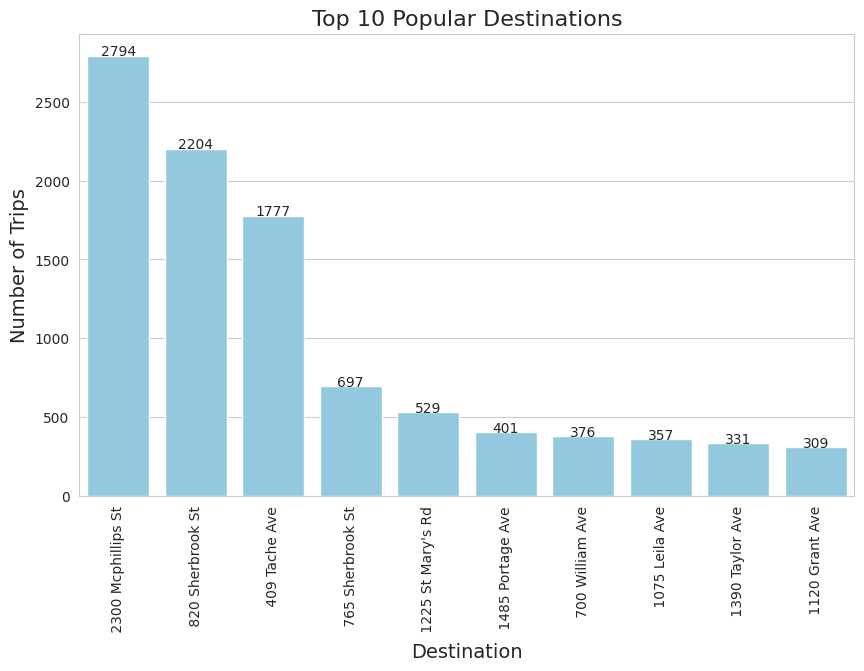

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style for the plot
sns.set_style("whitegrid")

# Calculate the counts of the top 20 popular destinations
destination_counts = clean_data['Destination_Address'].value_counts().head(10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=destination_counts.index, y=destination_counts.values, ax=ax, color='skyblue')

# Add the number of each column on the top
for i in range(destination_counts.shape[0]):
    ax.text(i, destination_counts.values[i] + 0.2, destination_counts.values[i], ha='center')

# Set the title and labels
ax.set_title('Top 10 Popular Destinations', fontsize=16)
ax.set_xlabel('Destination', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


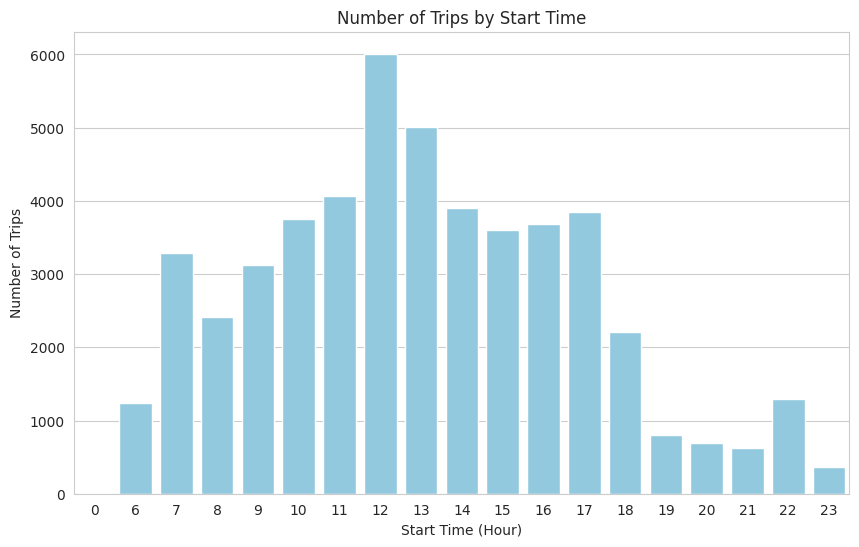

In [42]:

# Convert 'Start_Time_Time' to datetime.time
clean_data['Start_Time_Hour'] = clean_data['Start_Time_Time'].apply(lambda x: x.hour)

# Group by 'Start_Time_Hour' and count the number of trips
trip_counts = clean_data.groupby('Start_Time_Hour').size()

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=trip_counts.index, y=trip_counts.values, color='skyblue')

# Set the title and labels
plt.title('Number of Trips by Start Time')
plt.xlabel('Start Time (Hour)')
plt.ylabel('Number of Trips')

# Show the plot
plt.show()




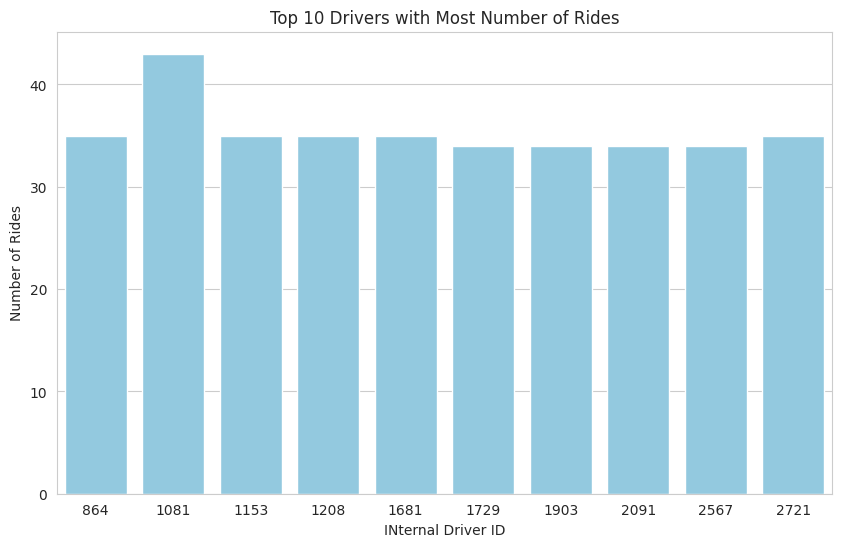

In [43]:


# Count the number of trips for each driver and get the top 20
trip_counts = clean_data['Internal_Driver_ID'].value_counts().head(10)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=trip_counts.index, y=trip_counts.values, color='skyblue')

# Set the title and labels
plt.title('Top 10 Drivers with Most Number of Rides')
plt.xlabel('INternal Driver ID')
plt.ylabel('Number of Rides')

# Show the plot
plt.show()


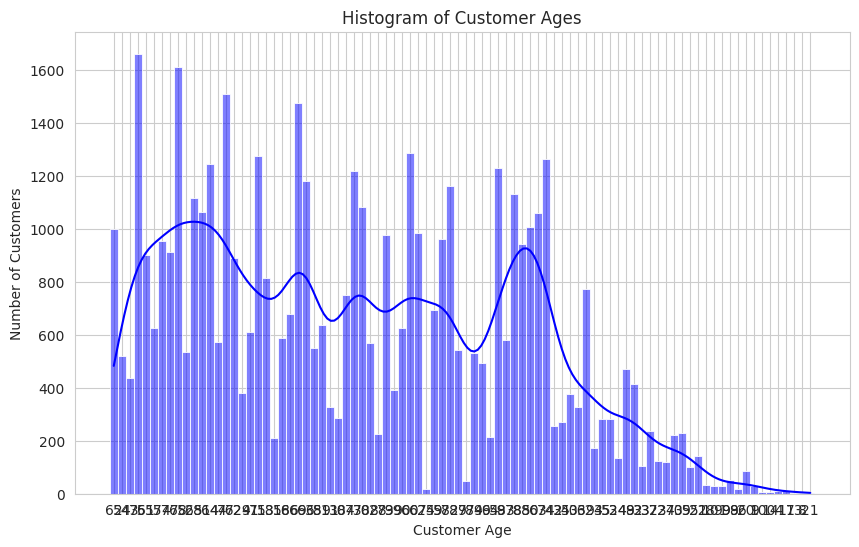

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a histogram with a Gaussian kernel density estimate
sns.histplot(data=clean_data, x='Customer_Age', bins=30, color='blue', kde=True)

# Set the title and labels
plt.title('Histogram of Customer Ages')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


**Comments:**

* Trips start mostly between 12:00 to 14:00

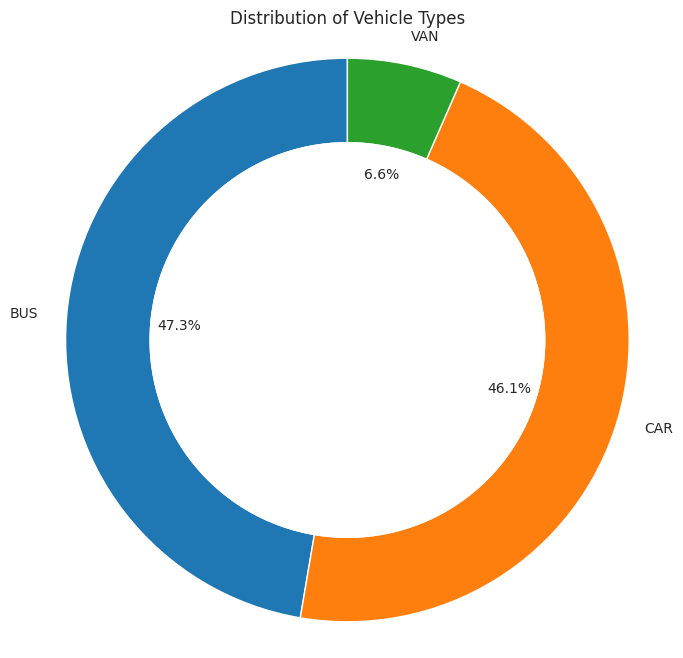

In [47]:
# CReating a donut plot with vehicle types
vehicle_type_counts = clean_data['Vehicle_Type'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Vehicle Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Draw a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


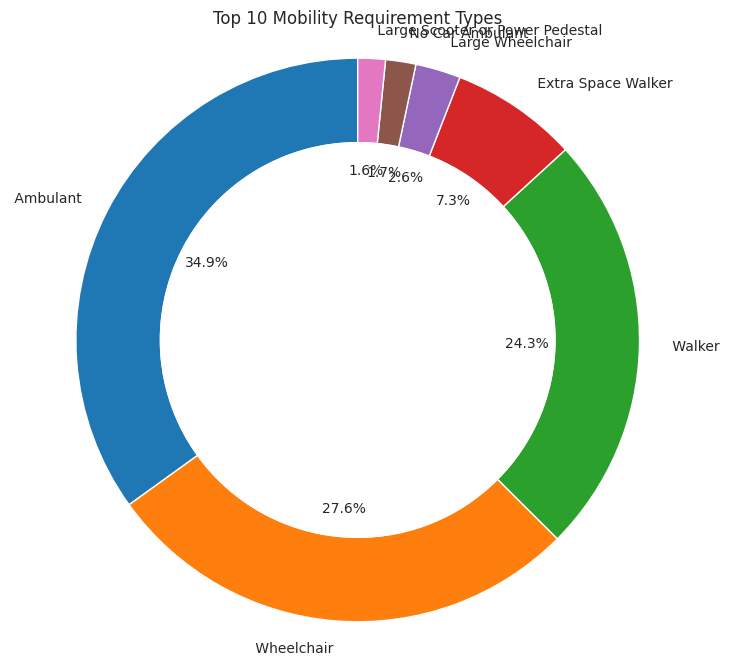

In [54]:

# Print a top7 movility requeriments
mobility_type_counts = clean_data['Mobility_Requirement_Type'].value_counts()

# Select the top 10 types
top_10_types = mobility_type_counts.head(7)

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_types, labels=top_10_types.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Top 10 Mobility Requirement Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Draw a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()




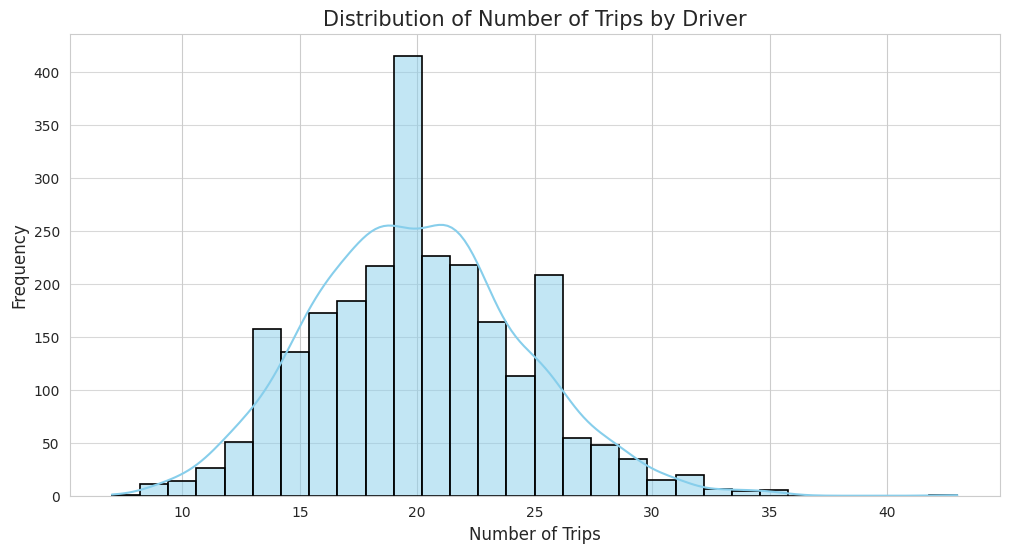

In [61]:
# Visualize the number of trips by each driver
driver_counts = clean_data['Internal_Driver_ID'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.histplot(driver_counts, bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Number of Trips by Driver', fontsize=15)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()



**Observations:**

* The highest demand for rides was observed from 12:00 to 14:00, particularly from Tuesday to Thursday.
* On average, drivers completed around 20 rides every two months, with a maximum of 35 rides.
* The majority of the mobility requirements were from ambulant individuals.
Buses were the most frequently used vehicles for transportation. Despite this, the Winnipeg WAN remains a minor player compared to the total number of vehicles in the city.
* The service was most commonly requested by individuals aged 46 and 78.
The primary commuting destinations for those using the service were McPhillips, Sherbrooke, and Tache Avenue.

The requeriments has increased by 20 % in the analyzed timespam.

It is highly recommended to explore various clustering models such as K-means, PCA (Principal Component Analysis), and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). These models can help optimize resource allocation, improve driver and vehicle efficiency, and enhance customer engagement.